In [120]:
%run main.ipynb

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


In [86]:
# Table for training results
result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Features", 
                                     "Optimal Parameters", "Monetary Value Per Instance - Mean", 
                                     "Monetary Value Per Instance - Standard Deviation", 
                                     "Time needed", "Raw Model"])

# Model factory -> only KNeighborsClassifier for in-depth analysis

In [87]:
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.model_selection import KFold

skf = StratifiedKFold(n_splits=10)

model_tuning_factory = [
    GridSearchCV(KNeighborsClassifier(), 
                 dict(
                     n_neighbors = [1, 3, 5, 10, 15],
                     weights = ['uniform', 'distance'],
                     p = [1, 2, 3]
                 ),
                 cv = skf,
                 scoring = my_custom_score,
                 n_jobs=4)
]           
                 
                 
iterations = 10                 
               
model_tuning_factory_randomized = [
    RandomizedSearchCV(KNeighborsClassifier(), 
                 dict(
                     n_neighbors = [1, 3, 5, 10, 15],
                     weights = ['uniform', 'distance'],
                     p = [1, 2, 3]
                 ),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations, 
                 n_jobs=4)
]

In [88]:
run()

Finished KNeighborsClassifier with No Scaling and 1 features after 4.891379356384277 seconds
Finished KNeighborsClassifier with No Scaling and 2 features after 3.53913950920105 seconds
Finished KNeighborsClassifier with No Scaling and 3 features after 8.927427530288696 seconds
Finished KNeighborsClassifier with No Scaling and 4 features after 9.866021633148193 seconds
Finished KNeighborsClassifier with No Scaling and 5 features after 15.379382133483887 seconds
Finished KNeighborsClassifier with No Scaling and 6 features after 18.298625946044922 seconds
Finished KNeighborsClassifier with No Scaling and 7 features after 21.055649757385254 seconds
Finished KNeighborsClassifier with No Scaling and 8 features after 22.933553457260132 seconds
Finished KNeighborsClassifier with No Scaling and 9 features after 23.241451740264893 seconds
Finished KNeighborsClassifier with No Scaling and 10 features after 22.065388202667236 seconds
Finished KNeighborsClassifier with No Scaling and 11 features af

In [121]:
result_table = result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)
result_table.index = range(0,result_table.shape[0])
result_table

,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Time needed,Raw Model
0,KNeighborsClassifier,LogScaler,6,"[trustLevel, lineItemVoidsPerPosition, scanned...","{'n_neighbors': 10, 'p': 2, 'weights': 'distan...",-0.156998,0.258287,43.041975,"KNeighborsClassifier(algorithm='auto', leaf_si..."
1,KNeighborsClassifier,LogScaler,3,"[trustLevel, scannedLineItems, pricePerScanned...","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.159659,0.239428,18.947784,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,KNeighborsClassifier,MinMaxScaler,2,"[trustLevel, scannedLineItems]","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.164981,0.203795,3.814433,"KNeighborsClassifier(algorithm='auto', leaf_si..."
3,KNeighborsClassifier,StandardScaler,2,"[trustLevel, scannedLineItems]","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.164981,0.203795,3.975017,"KNeighborsClassifier(algorithm='auto', leaf_si..."
4,KNeighborsClassifier,No Scaling,2,"[trustLevel, scannedLineItems]","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.164981,0.203795,3.539140,"KNeighborsClassifier(algorithm='auto', leaf_si..."
5,KNeighborsClassifier,LogScaler,2,"[trustLevel, scannedLineItems]","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.164981,0.203795,3.577571,"KNeighborsClassifier(algorithm='auto', leaf_si..."
6,KNeighborsClassifier,LogScaler,5,"[trustLevel, lineItemVoidsPerPosition, scanned...","{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}",-0.167642,0.222894,32.960487,"KNeighborsClassifier(algorithm='auto', leaf_si..."
7,KNeighborsClassifier,LogScaler,4,"[trustLevel, scannedLineItems, pricePerScanned...","{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}",-0.191591,0.220022,29.626671,"KNeighborsClassifier(algorithm='auto', leaf_si..."
8,KNeighborsClassifier,MinMaxScaler,3,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'n_neighbors': 15, 'p': 1, 'weights': 'distan...",-0.268760,0.034757,9.686497,"KNeighborsClassifier(algorithm='auto', leaf_si..."
9,KNeighborsClassifier,StandardScaler,3,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'n_neighbors': 15, 'p': 1, 'weights': 'distan...",-0.268760,0.034757,9.733805,"KNeighborsClassifier(algorithm='auto', leaf_si..."


# Print performance of best 10 models

In [125]:
for rank in range(0,11):
    best = BestModel(rank)
    monetary_value = get_monetary_value(best)
    print()
    best.print_best_model()
    print("-----------------------------------------------------------------------------------------------")

True negative:  1775
False positive:  0
False negative:  0
True positive:  104
520 for  1879  instances in the test set
0.2767429483767962  per instance in the test set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')
['trustLevel' 'lineItemVoidsPerPosition' 'scannedLineItems'
 'pricePerScannedLineItem' 'scansWithoutRegistrationPerScannedLineItem'
 'quantityModificationsPerScannedLineItem']
-----------------------------------------------------------------------------------------------
True negative:  1758
False positive:  17
False negative:  30
True positive:  74
-205 for  1879  instances in the test set
-0.10910058541777541  per instance in the test set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=1,
           weights='uniform')
['trustLevel' 'scannedLineItems' 'pricePerScann

In [138]:
fraud = train[train['fraud'] == 1]
non_fraud = train[train['fraud'] == 0] 

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


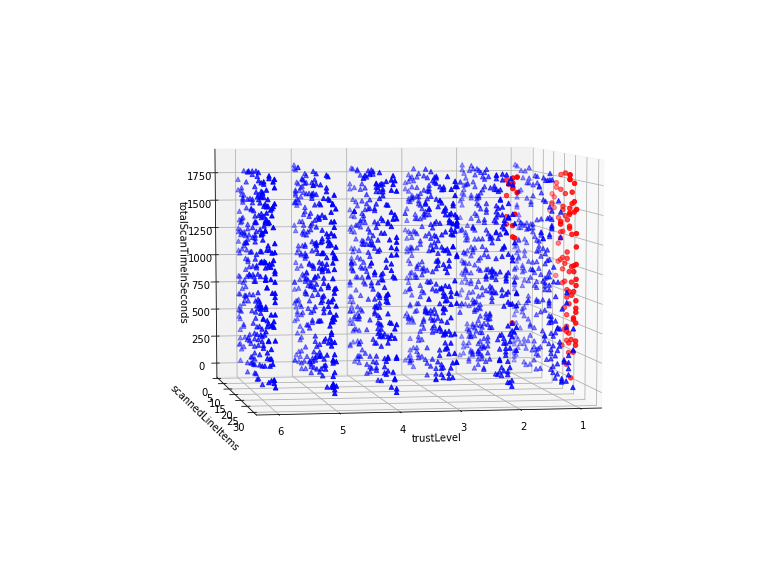

In [140]:
%matplotlib inline  
%matplotlib notebook
%pylab

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = fraud['trustLevel']
Y = fraud['scannedLineItems']
Z = fraud['totalScanTimeInSeconds']

Xs = non_fraud['trustLevel']
Ys = non_fraud['scannedLineItems']
Zs = non_fraud['totalScanTimeInSeconds']



ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()

# MinMax scalar

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


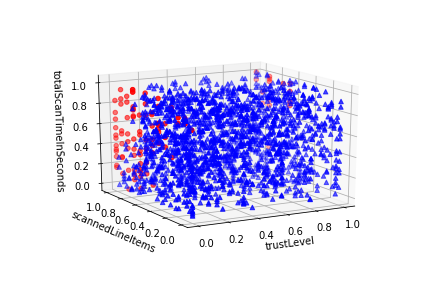

In [145]:
%matplotlib inline  
%matplotlib notebook
%pylab

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

feature_scaler = MinMaxScaler()  
fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(fraud.values), columns=fraud.columns, index=fraud.index)
non_fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(non_fraud.values), columns=non_fraud.columns, index=non_fraud.index)


X = fraud_scaled['trustLevel']
Y = fraud_scaled['scannedLineItems']
Z = fraud_scaled['totalScanTimeInSeconds']

Xs = non_fraud_scaled['trustLevel']
Ys = non_fraud_scaled['scannedLineItems']
Zs = non_fraud_scaled['totalScanTimeInSeconds']

 

ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()

# Standard scaler

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


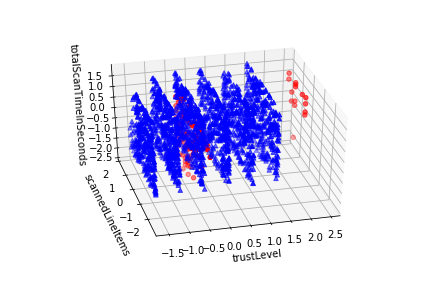

In [144]:
%matplotlib inline  
%matplotlib notebook
%pylab

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

feature_scaler = StandardScaler()  
fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(fraud.values), columns=fraud.columns, index=fraud.index)
non_fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(non_fraud.values), columns=non_fraud.columns, index=non_fraud.index)


X = fraud_scaled['trustLevel']
Y = fraud_scaled['scannedLineItems']
Z = fraud_scaled['totalScanTimeInSeconds']

Xs = non_fraud_scaled['trustLevel']
Ys = non_fraud_scaled['scannedLineItems']
Zs = non_fraud_scaled['totalScanTimeInSeconds']

 

ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()

# Log scaler

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


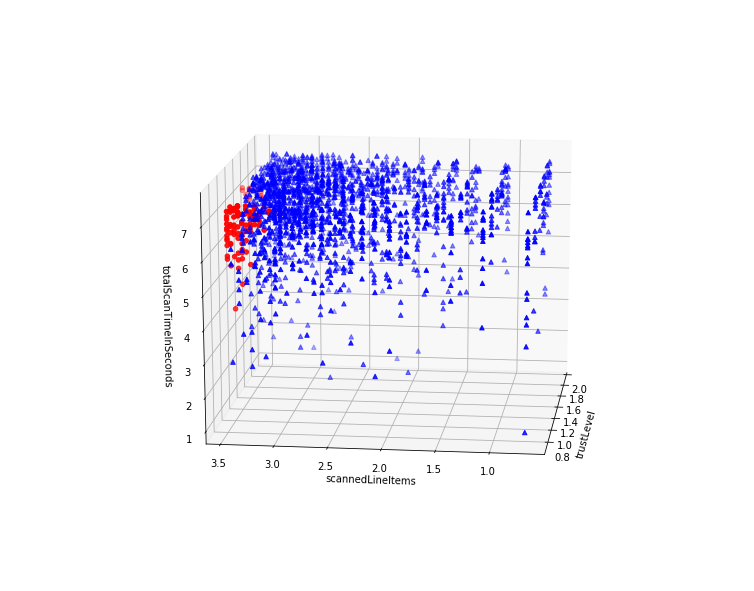

In [143]:
%matplotlib inline  
%matplotlib notebook
%pylab

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

feature_scaler = FunctionTransformer(np.log1p, validate=True)   
fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(fraud.values), columns=fraud.columns, index=fraud.index)
non_fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(non_fraud.values), columns=non_fraud.columns, index=non_fraud.index)


X = fraud_scaled['trustLevel']
Y = fraud_scaled['scannedLineItems']
Z = fraud_scaled['totalScanTimeInSeconds']

Xs = non_fraud_scaled['trustLevel']
Ys = non_fraud_scaled['scannedLineItems']
Zs = non_fraud_scaled['totalScanTimeInSeconds']

 

ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()